In [145]:
import autograd.numpy as np
from autograd import grad 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy.spatial import distance

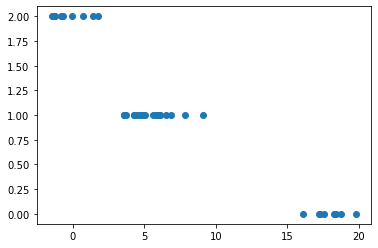

In [166]:
plt.scatter(df.iloc[:,1], df.iloc[:,2])

In [263]:
def k_means(df, k, max_iter):
    clusters = []
    
    seed = np.random.choice(np.arange(len(df.index)), size = k, replace = False)
    df['cluster'] = np.repeat(-1, len(df.index))
    df['cluster'] = df['cluster'].astype('int')
    centroids = np.zeros([k, len(df.columns) - 1])
    
    for i in range(k):
        df.iloc[seed[i],2] = i
        centroids[i] = df.iloc[seed[i],:2]

    for i in range(max_iter):
        print('Iteration: ' + str(i))
        changed = False
        distances = []
        
        for j in range(k):
            temp = df.iloc[:,:2] - centroids[j]
            distances.append(distance.cdist(df.iloc[:,:2].to_numpy(), [centroids[j]]))
            
        for j in range(len(df.index)):
            min_cluster = 0
            min_distance = distances[0][j]
            
            for m in range(1, len(distances)):
                if distances[m][j] < min_distance:
                    min_cluster = m
                    min_distance = distances[m][j]
                    
            if min_cluster != df.iloc[j, 2]: changed = True
            df.iloc[j, 2] = min_cluster
            
        for j in range(k):
            centroids[j] = np.mean(df[df['cluster'] == j].iloc[:,:2])
            
        if changed == False:
            print('No more changes made to the clusters')
            break
    for i in range(k):
        clusters.append(df[df['cluster'] == i].iloc[:,:2].values.tolist())
        
    return clusters

In [264]:
def SSE(clusters):
    sse = 0
    
    for cluster in clusters:
        sse += np.sum(distance.cdist(cluster, [np.mean(cluster, axis = 0)]))
                      
    return sse

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
No more changes made to the clusters
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
No more changes made to the clusters
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
No more changes made to the clusters
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
No more changes made to the clusters


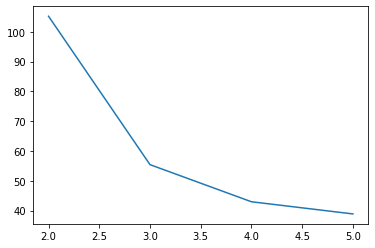

In [265]:
df = pd.read_csv('hw4_cluster.csv')

sse_score = []

for i in range(2, 6):
    clusters = k_means(df, i, 100)
    sse_score.append(SSE(clusters))

plt.plot([2, 3, 4, 5], sse_score)

Either $k = 3$ or $k = 4$ would be an appropriate choice as the number of clusters to put into the k-means algorithm. Of course, in this case we were able to visualize the data. Based on this initial data visualization choosing $k = 3$ is the obvious choice.